(1) I hereby agree to follow any and all assignment rules and procedures as stated in Canvas for this course, MATH2319.

(2) In particular, I solemnly swear that I will not discuss/ have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: Wei Zhang

# MATH2319 Machine Learning
### Semester 1, 2020                 Assignment 1
##### Wei Zhang      S3759607

## Question 1

#### **Data Description**

The **Credit Approval** data from the UCI Machine Learning Repository is used for this assignment. Two out of the four datasets are relevant to this assignment. Specifically, `Assignment1_Q1_crx.names` provides basic information on the dataset and `Assignment1_Q1_crx.data` is what will be prepared for machine learning.

According to `Assignment1_Q1_crx.names`, the attributes names and values have been changed to meaningless symbols to protect confidentiality. Below are attribute information from `Assignment1_Q1_crx.names`. There are 16 features in total.
- A1:   b, a.
- A2:	continuous.
- A3:	continuous.
- A4:	u, y, l, t.
- A5:	g, p, gg.
- A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7:	v, h, bb, j, n, z, dd, ff, o.
- A8:	continuous.
- A9:	t, f.
- A10:	t, f.
- A11:	continuous.
- A12:	t, f.
- A13:	g, p, s.
- A14:	continuous.
- A15:	continuous.
- A16:  +,-         (class attribute)

#### Read the data
The dataset was downloaded from UCI and then uploaded to Azure. `crx.data` was read in as a local file. An overview of the dataset is shown by checking the first 5 rows and the shape.

In [1]:
import numpy as np
import pandas as pd

crx_data = pd.read_csv('Assignment1_Q1_crx.data', sep = ',', names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13',
                                                       'A14', 'A15', 'A16'], header = None)
crx_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [2]:
crx_data.shape

(690, 16)

#### Converting data types and check for missing values of A2 column

The output does not match entirely the descriptions outlined in [Data Description](#Data-Description). A2 and A14 should be numeric features but they're shown to be 'object' upon checking. 
Before converting 'A2' and 'A14' columns to numeric values, NaN should be checked and '?' values have to be dealt with. 

1.74% of A2 column values and 1.88% of A14 column values are '?'. They are labeled as NaN value. After this, A2 and A14 columns are converted to numeric values.

In [3]:
crx_data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [4]:
crx_data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [5]:
# Check the percentage of '?' in A2 columns. 1.74% of A2 column values are '?'.
col_a2 = crx_data[crx_data['A2'] == '?'].shape[0]/len(crx_data)
round(col_a2*100, 2)

1.74

In [6]:
# Check the percentage of '?' in A14 columns. 1.88% of A14 column values are '?'.
col_a14 = crx_data[crx_data['A14'] == '?'].shape[0]/len(crx_data)
round(col_a14*100, 2)

1.88

In [7]:
convert_Column = [ 'A2', 'A14']
for col in convert_Column:
    crx_data.loc[crx_data[col] == '?', col] = np.nan

In [8]:
crx_data.isnull().sum()

A1      0
A2     12
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [9]:
crx_data[['A2', 'A14']] = crx_data[['A2', 'A14']].apply(pd.to_numeric) 
print(crx_data.dtypes)

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object


#### Visulise A2 column
Outliers of A2 features can be seen in the boxplot. 

In [10]:
import matplotlib.pyplot as plt
crx_data['A2'].plot(kind = 'box')
plt.show()

<Figure size 640x480 with 1 Axes>

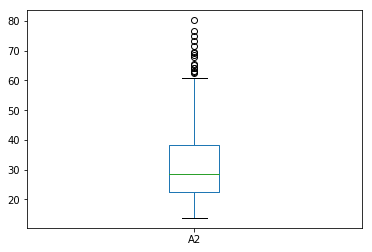

In [11]:
import matplotlib.pyplot as plt
crx_data['A2'].plot(kind = 'box')
plt.show()

#### Deal with outliers and missing values for numeric data.
All outliers/unusual values are set to missing values. Then any missing values are imputed with the mode for categorical features and with the median for numerical features. For-loop is performed for this.

In [12]:
numericColumn = [ 'A2', 'A3', 'A8', 'A11', 'A14', 'A15']
for col in numericColumn:
    q1, q3= np.nanpercentile(crx_data[col], [25,75])
    IQR = q3 - q1
    lower_bound = q1 -(1.5 * IQR) 
    upper_bound = q3 +(1.5 * IQR)
    crx_data.loc[crx_data[col] > upper_bound, col] = np.nan
    crx_data.loc[crx_data[col] < lower_bound, col] = np.nan
    median = crx_data[col].median()
    crx_data[col].fillna(median, inplace=True)

#### A2 values are discretized via equal-frequency binning with 3 bins
A2 values are named "low", "medium", and "high". Then integer encoding is performed so 0 - "low", 1 - "medium" and 2 - "high".

In [13]:
x1, x2, x3, x4 = np.percentile(crx_data['A2'], [0, 33, 66.6, 100])

In [14]:
crx_data['A2']=pd.cut(x = crx_data['A2'], bins = [0, x2, x3, x4], labels = ['low', 'medium', 'high'])

In [15]:
crx_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,medium,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,high,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,medium,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,medium,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,low,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [16]:
print(dict(enumerate(crx_data['A2'].astype('category').cat.categories)))

# 0 - "low"
# 1 - "medium"
# 2 - "high"

{0: 'low', 1: 'medium', 2: 'high'}


In [17]:
crx_data['A2'] = crx_data['A2'].astype('category').cat.codes

In [18]:
crx_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,1,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,2,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,1,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,1,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,0,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


Below is to confirm that A2 values are discretized via equal-frequency binning with 3 bins, and A2 data types are integer now.

In [19]:
crx_data['A2'].value_counts()

2    231
0    230
1    229
Name: A2, dtype: int64

In [20]:
print(crx_data.dtypes)

A1      object
A2        int8
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object


#### Prepare target feature
Assume the target feature is A16 column. Upon checking, A16 column is categorical feature with only 2 unique values. No missing/unusual values in A16 column. Keep A16 to the end. Then remove the target feature from the dataset and call it `target`.

Label-encode the target feature so that the '+' is encoded as "1" and '-' is encoded as "0". Confirm correctness of your label-encoding by getting a value counts.

In [21]:
crx_data['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [22]:
crx_data = crx_data[[col for col in crx_data.columns if col not in ['A16']] + ['A16']]

In [23]:
target = crx_data['A16']
crx_data = crx_data.drop(columns = 'A16')

In [24]:
target = target.replace({'-': 0, '+': 1})

target.value_counts()

0    383
1    307
Name: A16, dtype: int64

#### Deal with outliers and missing values for categorical data.
Similarly, for-loop is performed to set all outliers/unusual values are set to missing values, and then impute any missing values with the mode for categorical features.

In [25]:
crx_data.describe(include = np.object)

,A1,A4,A5,A6,A7,A9,A10,A12,A13
count,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3
top,b,u,g,c,v,t,f,f,g
freq,468,519,519,137,399,361,395,374,625


In [26]:
categoricalColumn = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
for col in categoricalColumn:
    print('Before imputation. the unique values of', col, crx_data[col].unique())
    print('\nAfter imputation')
    crx_data.loc[crx_data[col] == '?', col] = np.nan
    mode = crx_data[col].mode()[0]
    crx_data[col].fillna(mode, inplace=True)
    print(crx_data[col].unique())
    print('\n')

Before imputation. the unique values of A1 ['b' 'a' '?']

After imputation
['b' 'a']


Before imputation. the unique values of A4 ['u' 'y' '?' 'l']

After imputation
['u' 'y' 'l']


Before imputation. the unique values of A5 ['g' 'p' '?' 'gg']

After imputation
['g' 'p' 'gg']


Before imputation. the unique values of A6 ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']

After imputation
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']


Before imputation. the unique values of A7 ['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']

After imputation
['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']


Before imputation. the unique values of A9 ['t' 'f']

After imputation
['t' 'f']


Before imputation. the unique values of A10 ['t' 'f']

After imputation
['t' 'f']


Before imputation. the unique values of A12 ['f' 't']

After imputation
['f' 't']


Before imputation. the unique values of A13 ['g' 's' 'p']

After imputation
['g' 's' 'p']




In [27]:
for col in categoricalColumn:
    print(col + ':')
    print(crx_data[col].value_counts())
    print('\n')

A1:
b    480
a    210
Name: A1, dtype: int64


A4:
u    525
y    163
l      2
Name: A4, dtype: int64


A5:
g     525
p     163
gg      2
Name: A5, dtype: int64


A6:
c     146
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64


A7:
v     408
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64


A9:
t    361
f    329
Name: A9, dtype: int64


A10:
f    395
t    295
Name: A10, dtype: int64


A12:
f    374
t    316
Name: A12, dtype: int64


A13:
g    625
s     57
p      8
Name: A13, dtype: int64




#### Copy data and encode categorical features
So all the categorical features appear to be nominal. Perform one-hot encoding for all the descriptive categorical features and call this encoded data frame as `crx_encoded`. If a categorical descriptive feature has only 2 levels, encode it with only one binary variable. For other categorical 
features (with more than 2 levels), use label encoding (see below).

In [28]:
crx_encoded = crx_data.copy()   # retain original data without encoding for further analysis

# If a categorical descriptive feature has only 2 levels, only one binary variable
for col in categoricalColumn:
    x = len(crx_encoded[col].unique())
    if (x == 2):
        crx_encoded[col] = pd.get_dummies(crx_encoded[col], drop_first=True)
    if (x != 2):
        crx_encoded[col] = crx_encoded[col].astype('category').cat.codes

In [29]:
print(crx_encoded.shape)
crx_encoded.head()

(690, 15)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,1,0.000,1,0,12,7,1.25,1,1,1.0,0,0,202.0,0.0
1,0,2,4.460,1,0,10,3,3.04,1,1,6.0,0,0,43.0,560.0
2,0,1,0.500,1,0,10,3,1.50,1,0,0.0,0,0,280.0,824.0
3,1,1,1.540,1,0,12,7,3.75,1,1,5.0,1,0,100.0,3.0
4,1,0,5.625,1,0,12,7,1.71,1,0,0.0,0,2,120.0,0.0


In [30]:
crx_encoded.dtypes

A1       uint8
A2        int8
A3     float64
A4        int8
A5        int8
A6        int8
A7        int8
A8     float64
A9       uint8
A10      uint8
A11    float64
A12      uint8
A13       int8
A14    float64
A15    float64
dtype: object

#### Normalization
After encoding all the categorical features, we end up with a data frame that is all numerical. Next, perform a range normalization of the descriptive features using MinMaxScaler() method within preprocessing submodule of Scikit-Learn, and call it crx_encoded_norm_numpy.

In [31]:
crx_encoded.describe(include='all').round(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,0.696,1.001,4.292,1.233,0.475,5.699,5.099,1.306,0.523,0.428,0.935,0.458,0.177,170.168,84.499
std,0.460,0.818,4.171,0.430,0.850,4.286,2.511,1.489,0.500,0.495,1.788,0.499,0.558,134.509,187.605
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,1.000,1.000,0.000,1.000,3.000,0.165,0.000,0.000,0.000,0.000,0.000,80.000,0.000
50%,1.000,1.000,2.710,1.000,0.000,5.000,7.000,0.750,1.000,0.000,0.000,0.000,0.000,160.000,0.000
75%,1.000,2.000,6.500,1.000,0.000,10.000,7.000,1.865,1.000,1.000,1.000,1.000,0.000,260.000,35.000
max,1.000,2.000,16.500,2.000,2.000,13.000,8.000,6.290,1.000,1.000,7.000,1.000,2.000,560.000,960.000


In [32]:
from sklearn import preprocessing
Data_scaler = preprocessing.MinMaxScaler()
crx_encoded_norm_numpy = Data_scaler.fit_transform(crx_encoded)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int8, uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


The descriptive features after scaling by randomly sampling 5 rows with a random state of 1 from crx_encoded_norm_df are shown below.
Then get the shape and a description of crx_encoded_norm_df with include='all' option. Observe that everything is now between 0 and 1 and that binary features are still kept as binary after the min-max scaling.

In [33]:
crx_encoded_norm_df = pd.DataFrame(crx_encoded_norm_numpy, columns=crx_encoded.columns)
crx_encoded_norm_df.sample(n=5, random_state = 1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
666,0.0,0.0,0.712121,0.5,0.0,0.076923,0.875,0.039746,0.0,0.0,0.000000,1.0,0.0,0.321429,0.000000
520,1.0,0.0,0.454545,0.5,0.0,0.615385,0.875,0.238474,1.0,1.0,0.142857,0.0,0.0,0.285714,0.243750
681,1.0,0.5,0.060606,1.0,1.0,0.230769,0.375,0.476948,0.0,0.0,0.000000,0.0,0.0,0.314286,0.559375
23,0.0,0.5,0.878788,0.5,0.0,1.000000,0.375,0.490461,1.0,1.0,0.142857,0.0,0.0,0.214286,0.011458
65,1.0,1.0,0.093333,0.5,0.0,0.153846,0.875,0.244833,1.0,1.0,0.142857,1.0,0.0,0.928571,0.000000


In [34]:
print(f'Shape of crx_encoded_norm_df is {crx_encoded_norm_df.shape}\n') 

crx_encoded_norm_df.describe(include='all').round(3)

Shape of crx_encoded_norm_df is (690, 15)



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,0.696,0.501,0.260,0.617,0.238,0.438,0.637,0.208,0.523,0.428,0.134,0.458,0.088,0.304,0.088
std,0.460,0.409,0.253,0.215,0.425,0.330,0.314,0.237,0.500,0.495,0.255,0.499,0.279,0.240,0.195
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.061,0.500,0.000,0.077,0.375,0.026,0.000,0.000,0.000,0.000,0.000,0.143,0.000
50%,1.000,0.500,0.164,0.500,0.000,0.385,0.875,0.119,1.000,0.000,0.000,0.000,0.000,0.286,0.000
75%,1.000,1.000,0.394,0.500,0.000,0.769,0.875,0.297,1.000,1.000,0.143,1.000,0.000,0.464,0.036
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


#### Define a new dataset **df_clean**
Define a new data frame called df_clean which is the combination of the normalized and scaled descriptive features and the target feature with the target feature as the last column. 
Randomly sample 5 rows from df_clean with a random state of 1.

Write the clean dataset df_clean to a CSV file called df_clean.csv.

In [35]:
df_clean = crx_encoded_norm_df.assign(target = target.values)

In [36]:
df_clean.sample(n=5, random_state=1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
666,0.0,0.0,0.712121,0.5,0.0,0.076923,0.875,0.039746,0.0,0.0,0.000000,1.0,0.0,0.321429,0.000000,0
520,1.0,0.0,0.454545,0.5,0.0,0.615385,0.875,0.238474,1.0,1.0,0.142857,0.0,0.0,0.285714,0.243750,1
681,1.0,0.5,0.060606,1.0,1.0,0.230769,0.375,0.476948,0.0,0.0,0.000000,0.0,0.0,0.314286,0.559375,0
23,0.0,0.5,0.878788,0.5,0.0,1.000000,0.375,0.490461,1.0,1.0,0.142857,0.0,0.0,0.214286,0.011458,1
65,1.0,1.0,0.093333,0.5,0.0,0.153846,0.875,0.244833,1.0,1.0,0.142857,1.0,0.0,0.928571,0.000000,1


In [37]:
df_clean.shape

(690, 16)

In [38]:
df_clean.describe(include='all').round(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
count,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000,690.000
mean,0.696,0.501,0.260,0.617,0.238,0.438,0.637,0.208,0.523,0.428,0.134,0.458,0.088,0.304,0.088,0.445
std,0.460,0.409,0.253,0.215,0.425,0.330,0.314,0.237,0.500,0.495,0.255,0.499,0.279,0.240,0.195,0.497
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.061,0.500,0.000,0.077,0.375,0.026,0.000,0.000,0.000,0.000,0.000,0.143,0.000,0.000
50%,1.000,0.500,0.164,0.500,0.000,0.385,0.875,0.119,1.000,0.000,0.000,0.000,0.000,0.286,0.000,0.000
75%,1.000,1.000,0.394,0.500,0.000,0.769,0.875,0.297,1.000,1.000,0.143,1.000,0.000,0.464,0.036,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [39]:
df_clean.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,1.0,0.5,0.000000,0.5,0.0,0.923077,0.875,0.198728,1.0,1.0,0.142857,0.0,0.0,0.360714,0.000000,1
1,0.0,1.0,0.270303,0.5,0.0,0.769231,0.375,0.483307,1.0,1.0,0.857143,0.0,0.0,0.076786,0.583333,1
2,0.0,0.5,0.030303,0.5,0.0,0.769231,0.375,0.238474,1.0,0.0,0.000000,0.0,0.0,0.500000,0.858333,1
3,1.0,0.5,0.093333,0.5,0.0,0.923077,0.875,0.596184,1.0,1.0,0.714286,1.0,0.0,0.178571,0.003125,1
4,1.0,0.0,0.340909,0.5,0.0,0.923077,0.875,0.271860,1.0,0.0,0.000000,0.0,1.0,0.214286,0.000000,1


In [40]:
df_clean.to_csv('df_clean.csv', index=False)

## Question 2

#### Question a
Read the `Assignment1_Q2.csv` into the notebook and check the first few rows.
For-loop is used to calculate the Manhattan distance between Russia and all countries in the dataset. When k = 3, the 3 lowest distances are with Argentina, USA and China. The last row of the dataset is deleted as it contains the query row. 
The predicted CPI of Russia using this model with Manhattan distance is the average of the CPI among Argentina, USA and China.

In [41]:
corruption = pd.read_csv('Assignment1_Q2.csv', sep = ',')
corruption.head()

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961


In [42]:
for country in corruption['COUNTRY_ID']:
    mah1 = abs(67.62 - corruption.loc[corruption['COUNTRY_ID']==country, 'LIFE_EXP']) + abs(31.68 - corruption.loc[corruption['COUNTRY_ID']==country, 'TOP10_INCOME']) + abs(10-corruption.loc[corruption['COUNTRY_ID']==country, 'INFANT_MORT']) + abs(3.87 - corruption.loc[corruption['COUNTRY_ID']==country, 'MIL_SPEND']) + abs(12.9-corruption.loc[corruption['COUNTRY_ID']==country, 'SCHOOL_YEARS'])
    x = [country, mah1.values[0]]
    print(x)

['Afghanistan', 93.85]
['Haiti', 114.99000000000001]
['Nigeria', 107.07]
['Egypt', 27.17]
['Argentina', 17.97999999999999]
['China', 21.07]
['Brazil', 29.39]
['Israel', 26.25999999999999]
['U.S.A', 18.069999999999993]
['Ireland', 28.15]
['U.K.', 22.64]
['Germany', 32.18999999999999]
['Canada', 29.109999999999992]
['Australia', 29.96]
['Sweden', 33.61000000000001]
['New Zealand', 25.36]
['Russia', 0.0]


The output above shows that the smallest distances are distances to Argentina, USA and China. 
Of course, distance between the query instance to Russia is 0.

Next, a new dataset called `corruption_new` is created. This dataset does not have the last row (query instance) and its 'CPI' column is set to be numeric values. It is later used to calculate the average 'CPI' of those three countries.

In [43]:
corruption.dtypes
corruption_new = corruption[:-1]

In [44]:
corruption_new['CPI'] = corruption_new['CPI'].apply(pd.to_numeric) 
print(corruption_new.dtypes)

COUNTRY_ID       object
LIFE_EXP        float64
TOP10_INCOME    float64
INFANT_MORT     float64
MIL_SPEND       float64
SCHOOL_YEARS    float64
CPI             float64
dtype: object


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
# Of course, its Manhattan distance to Russia is 0. 
# It's easy to see that 3 nearest neighbors are Argentina, USA and China
M3 = (corruption_new.loc[corruption_new['COUNTRY_ID']=='Argentina', 'CPI'].values[0]+corruption_new.loc[corruption_new['COUNTRY_ID']=='U.S.A', 'CPI'].values[0]+ corruption_new.loc[corruption_new['COUNTRY_ID']=='China', 'CPI'].values[0])/3
M3.round(4)

4.5891

With the 3-nearest neighbor prediction model using Manhattan distance, the CPI of Russia will be 4.5891. 

#### Question b
Use k = 16 (the full dataset) and a weighted k-NN prediction model. For-loop is performed to calculate the weighted average of the target values of all the CPI values. The calculation below is based on the formula in the textbook *Fundamentals of Machine Learning for Predictive Data Analytics* chapter 5. **x** is the list of each country's CPI value divided by its Mahattan-distance squared. **y** is the list of the inverse of each country's Mahattan-distance squared.
Based on the weighted 16-NN prediction model using Manhattan distance, the CPI of Russia will be 6.1215.

In [46]:
# k = 16
x = []
y = []
for country in corruption_new['COUNTRY_ID']:
    mah2 = abs(67.62 - corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'LIFE_EXP']) + abs(31.68 - corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'TOP10_INCOME']) + abs(10-corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'INFANT_MORT']) + abs(3.87 - corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'MIL_SPEND']) + abs(12.9-corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'SCHOOL_YEARS'])
    weight_dt = corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'CPI'].values[0]/mah2**2
    weight_db = 1/mah2**2
    x.append(weight_dt.values[0])
    y.append(weight_db.values[0])

print(x)
print(y)

[0.0001722446155108144, 0.00013612197103373764, 0.0002136517119801859, 0.003877222287620753, 0.009267805904719258, 0.00818930457360812, 0.004369323806592039, 0.008420830072930551, 0.021853463549027976, 0.009510078272638651, 0.015168866823159235, 0.007765035981123654, 0.010234341339741077, 0.009853146429329003, 0.008231441015176531, 0.01471351963896546]
[0.00011353543966173253, 7.56275187697859e-05, 8.722970317241086e-05, 0.0013546301053807396, 0.0030932899117917484, 0.002252531789418011, 0.0011577127809522904, 0.0014501420849214817, 0.0030625535755466143, 0.001261953061655872, 0.0019509545630486084, 0.0009650682916100538, 0.0011800912470154024, 0.0011140800105525657, 0.0008852439657123762, 0.001554896555841933]


In [47]:
M16 = sum(x)/sum(y)
M16.round(4)

6.1215

With a weighted 16-NN prediction model using Manhattan distance, the CPI of Russia will be 6.1215.

#### Question c
As the descriptive features in this dataset are of different types and measured in different units. Range normalization is performed for all discriptive features including Russia's, so original dataset `corruption` is used.
For-loop is performed and the 3-nearest neighbors are USA, UK and Argentina. With a 3-nearest neighbor prediction model using Manhattan distance after range normalization, the CPI of Russia will be 5.969.

In [48]:
# Range normalization
for col in ['LIFE_EXP', 'TOP10_INCOME', 'INFANT_MORT', 'MIL_SPEND', 'SCHOOL_YEARS']:
    max_col = max(corruption[col])
    min_col = min(corruption[col])
    corruption[col] = (corruption[col] - min_col)/(max_col - min_col)

corruption

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,0.393907,0.044531,0.896509,0.651198,0.000000,1.5171
1,Haiti,0.000000,1.000000,0.881546,0.000000,0.217391,1.7999
2,Nigeria,0.169857,0.631250,1.000000,0.146707,0.268116,2.4493
3,Egypt,0.686978,0.176172,0.214464,0.264970,0.355072,2.8622
4,Argentina,0.829604,0.399609,0.135910,0.100299,0.702899,2.9961
5,China,0.805338,0.308984,0.140898,0.278443,0.434783,3.6356
6,Brazil,0.758156,0.814844,0.150873,0.200599,0.492754,3.7741
7,Israel,0.978700,0.262891,0.014963,1.000000,0.876812,5.8069
8,U.S.A,0.903478,0.303906,0.048628,0.693114,0.963768,7.1357
9,Ireland,0.947695,0.201563,0.013716,0.076347,0.804348,7.536


In [49]:
m = []
n = []
for country in corruption['COUNTRY_ID']:
    mah3 = abs(0.609868 - corruption.loc[corruption['COUNTRY_ID']==country, 'LIFE_EXP']) + abs(0.375391 - corruption.loc[corruption['COUNTRY_ID']==country, 'TOP10_INCOME']) + abs(0.094763-corruption.loc[corruption['COUNTRY_ID']==country, 'INFANT_MORT']) + abs(0.565868 - corruption.loc[corruption['COUNTRY_ID']==country, 'MIL_SPEND']) + abs(0.905797-corruption.loc[corruption['COUNTRY_ID']==country, 'SCHOOL_YEARS'])
    m.append([country, mah3.values[0]])
    n.append(mah3.values[0])
print(m)

[['Afghanistan', 2.3396933695701323], ['Haiti', 3.2755338303155153], ['Nigeria', 2.6579493668038747], ['Egypt', 1.2476520637511865], ['Argentina', 0.9535683142731981], ['China', 1.0664510242792904], ['Brazil', 1.4221629795243687], ['Israel', 1.024250645625459], ['U.S.A', 0.5964462358916544], ['Ireland', 1.1836724542417192], ['U.K.', 0.7295071851276143], ['Germany', 1.2451421750960585], ['Canada', 1.1541755441205728], ['Australia', 1.11011109875849], ['Sweden', 1.2346621399874094], ['New Zealand', 1.0202674647508503], ['Russia', 9.432728098751619e-07]]


The sorting of `n` shows the 3 lowest Manhattan distances. Noted the first one is the distance to query itself. 
Then map the 3 distances back to previous output and the 3 countries are identified accordingly. They are USA, UK and Argentina.

In [50]:
n.sort()
n
# 3-nearest neighbors are USA, UK and Argentina

[9.432728098751619e-07,
 0.5964462358916544,
 0.7295071851276143,
 0.9535683142731981,
 1.0202674647508503,
 1.024250645625459,
 1.0664510242792904,
 1.11011109875849,
 1.1541755441205728,
 1.1836724542417192,
 1.2346621399874094,
 1.2451421750960585,
 1.2476520637511865,
 1.4221629795243687,
 2.3396933695701323,
 2.6579493668038747,
 3.2755338303155153]

In [51]:
M3c = (corruption_new.loc[corruption_new['COUNTRY_ID']=='U.S.A', 'CPI'].values[0]+corruption_new.loc[corruption_new['COUNTRY_ID']=='U.K.', 'CPI'].values[0]+ corruption_new.loc[corruption_new['COUNTRY_ID']=='Argentina', 'CPI'].values[0])/3
M3c.round(4)

5.969

With a 3-nearest neighbor prediction model using Manhattan distance after range normalization, the CPI of Russia will be 5.969.

#### Question d
A weighted K-NN prediction model is used with the range-normalized dataset `corruption`. 
`corruption_new` is used when calculating the CPI values as they are numeric in `corruption_new`. The formula used below is the same one used in question b.

In [52]:
# corruption dataset has been range normalised.
j = []
k = []
for country in corruption_new['COUNTRY_ID']:
    mah4 = abs(0.609868 - corruption.loc[corruption['COUNTRY_ID']==country, 'LIFE_EXP']) + abs(0.375391 - corruption.loc[corruption['COUNTRY_ID']==country, 'TOP10_INCOME']) + abs(0.094763-corruption.loc[corruption['COUNTRY_ID']==country, 'INFANT_MORT']) + abs(0.565868 - corruption.loc[corruption['COUNTRY_ID']==country, 'MIL_SPEND']) + abs(0.905797-corruption.loc[corruption['COUNTRY_ID']==country, 'SCHOOL_YEARS'])
    weight_dt = corruption_new.loc[corruption_new['COUNTRY_ID']==country, 'CPI'].values[0]/mah4**2
    weight_db = 1/mah4**2
    j.append(weight_dt.values[0])
    k.append(weight_db.values[0])

print(j)
print(k)

[0.277138153923223, 0.16775837027619628, 0.34669579602334544, 1.8387089870469455, 3.2949792296728693, 3.19664392921722, 1.866012998332245, 5.535181351248549, 20.058293362904788, 5.378706015340324, 14.609886295465317, 5.189763156051066, 6.510293573091043, 7.176714432268, 6.09981457541028, 9.090483781595342]
[0.18267625991907127, 0.09320427261303199, 0.14154893072442962, 0.6424110778586212, 1.0997560928116115, 0.8792617254970898, 0.4944259554151308, 0.9532076239040709, 2.8109776704324436, 0.7137348746470706, 1.8790608860934672, 0.6450035614833356, 0.7506824529364131, 0.811459988723457, 0.6559998467935989, 0.9606649034203073]


In [53]:
M16d = sum(j)/sum(k)
M16d.round(4)

6.6091

With a weighted 16-NN prediction model using Manhattan distance after range-normalization, the CPI of Russia will be 6.6091.

#### Question e

In [54]:
print(M3)
print(M16)
print(M3c)
print(M16d)

4.589133333333334
6.121484701869465
5.968966666666667
6.609054317122626


The actual 2011 CPI for Russia was 2.4488, so the 3-nearest neighbor prediction model using Manhattan distance was the most accurate.
This is probably because the dataset are quite small and biased. There are quite a few countries with high CPI values in the dataset, which makes the training data unbalanced. 
When k = 16, the neighbors far away has to be considered. Therefore, the high CPI in some neighbors contribute to the predicting results. This is the problem with overfitting. 

Also, the Manhattan distance is more significant when some features are far away between query instance and neighbors. The range normalization help with this issue. Due to this reason, our model using normalized dataset with 3-nearest neighbor is not as good in terms of predicting. We could try Euclidean distance instead. 